In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import os
import matplotlib.pyplot as plt


In [35]:
df = pd.read_csv("C:\\Users\\nayan\\Downloads\\archive\\Mall_Customers.csv")

#check the shape of your dataset
print('Shape of the dataset:',df.shape)

#check the datatype of the columns
print(df.dtypes)

#check for missing values
print('\nMissing values in each column:')
print(df.isnull().sum())



Shape of the dataset: (200, 5)
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [37]:
#get summary of the numerical columns
df.describe().astype(int)



,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200,200,200,200
mean,100,38,60,50
std,57,13,26,25
min,1,18,15,1
25%,50,28,41,34
50%,100,36,61,50
75%,150,49,78,73
max,200,70,137,99


In [39]:
#set the style of the seaborn plot
sns.set(style='whitegrid')

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

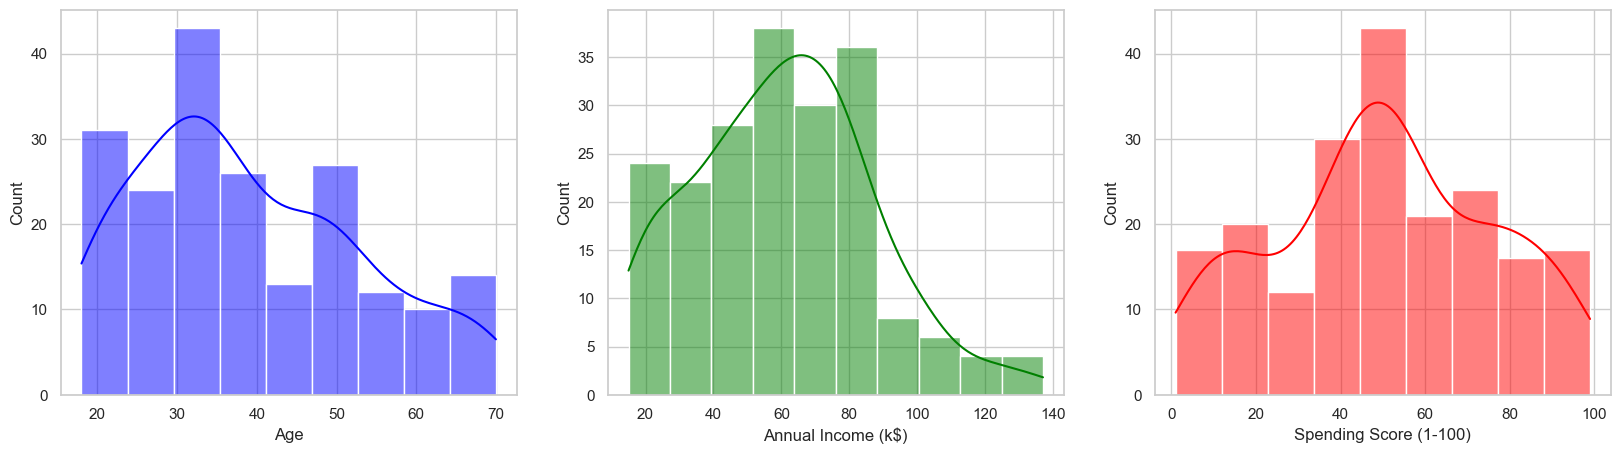

In [75]:
#create a figure and axis bjects
fig, axs=plt.subplots(1,3,figsize=(20,5))
#plot the distribution of age,annual incme, and spending score
sns.histplot(data=df,x='Age',kde=True,color='blue',ax=axs[0])
sns.histplot(data=df, x='Annual Income (k$)', kde=True, color='green', ax=axs[1])
sns.histplot(data=df, x='Spending Score (1-100)', kde=True, color='red', ax=axs[2])

In [87]:
#set the titles of the plot
axs[0].set_title('Age Distribution')
axs[1].set_title('Annual Income Distribution')
axs[2].set_title('Spending Score Distribution')


In [89]:
#set the title for the entire plot
fig.suptitle('Distribution Analysis of Age, Annual Income, and Spending Score')

# Display the plots
plt.show()

In [21]:


#select the features to use for clustering
features=df[['Age','Annual Income (k$)','Spending Score (1-100)']]



In [83]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

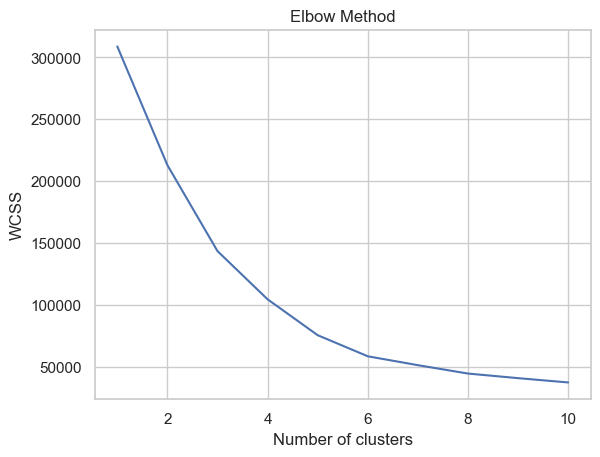

In [29]:
#plot the WCSS values
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()   

In [79]:


# Or if you want to suppress only a specific type of warning (e.g., DeprecationWarning):
# warnings.filterwarnings("ignore", category=DeprecationWarning)

kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)    
#fit the model to the data and predict the cluster labels
labels=kmeans.fit_predict(features)


In [52]:
#add the cluster label to the dataframe
df['Cluster'] =labels
#display the first few rows of the dataframe with the cluster labels
df.head(100)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
95,96,Male,24,60,52,2
96,97,Female,47,60,47,2
97,98,Female,27,60,50,2
98,99,Male,48,61,42,2


In [54]:
# Calculate the mean values of Age, Annual Income, and Score for each cluster
cluster_means = df.groupby('Cluster')[
['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().astype(int)

# Display the cluster means
cluster_means 

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45,26,20
1,32,86,82
2,43,55,49
3,25,26,78
4,40,87,17


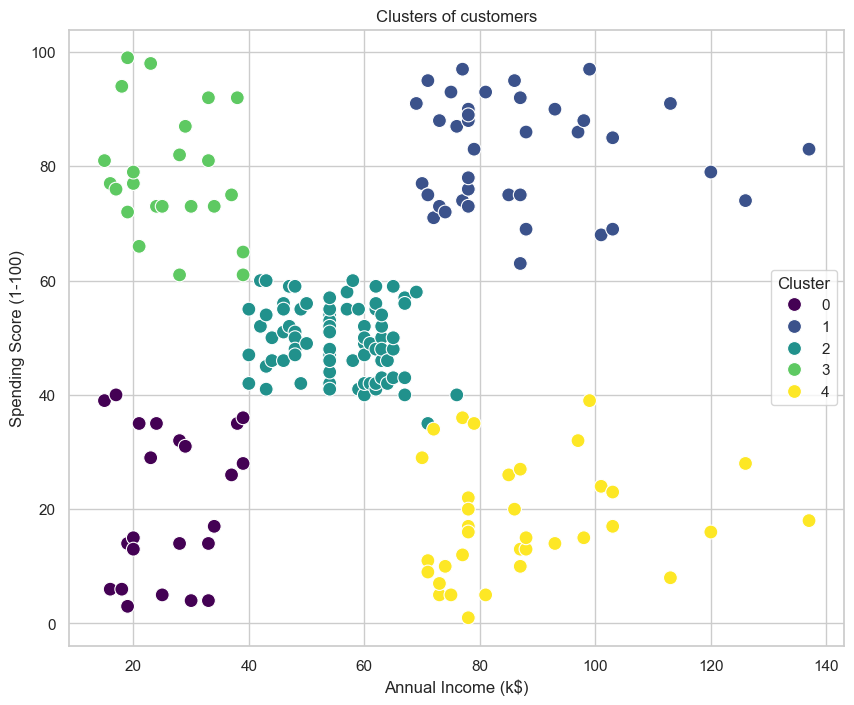

In [71]:
# Create a scatter plot of 'Annual Income (k$)' vs 'Spending Score (1-100)' colored by 'Cluster'
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
# Add a title to the plot
plt.title('Clusters of customers')
plt.show()

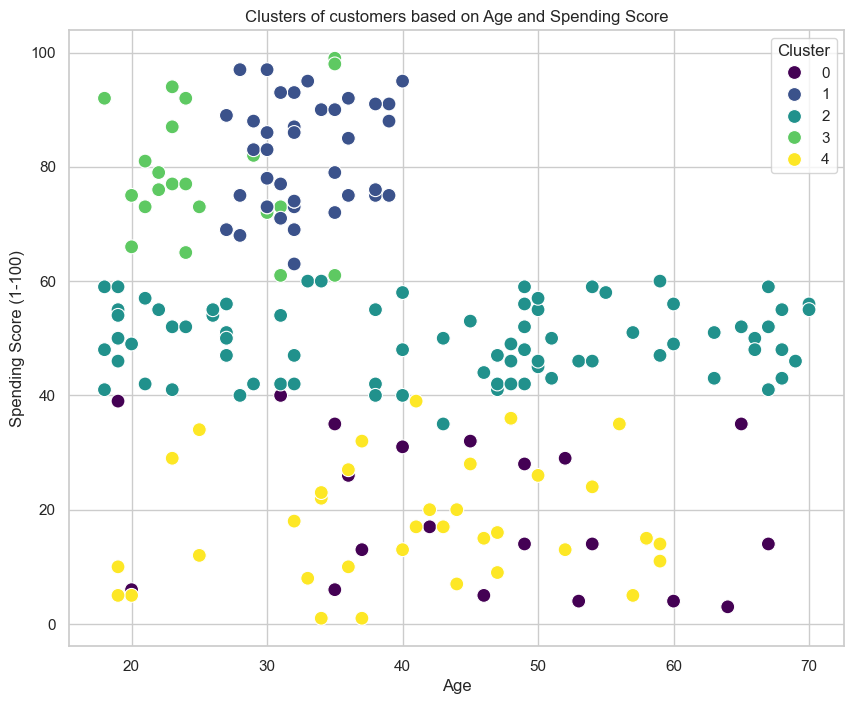

In [66]:
 

# Create a scatter plot of Age vs Spending Score 
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster', 
palette='viridis', s=100)
# Add a title to the plot
plt.title('Clusters of customers based on Age and Spending Score')

# Display the plot
plt.show()  



In [11]:
from mpl_toolkits.mplot3d import Axes3D

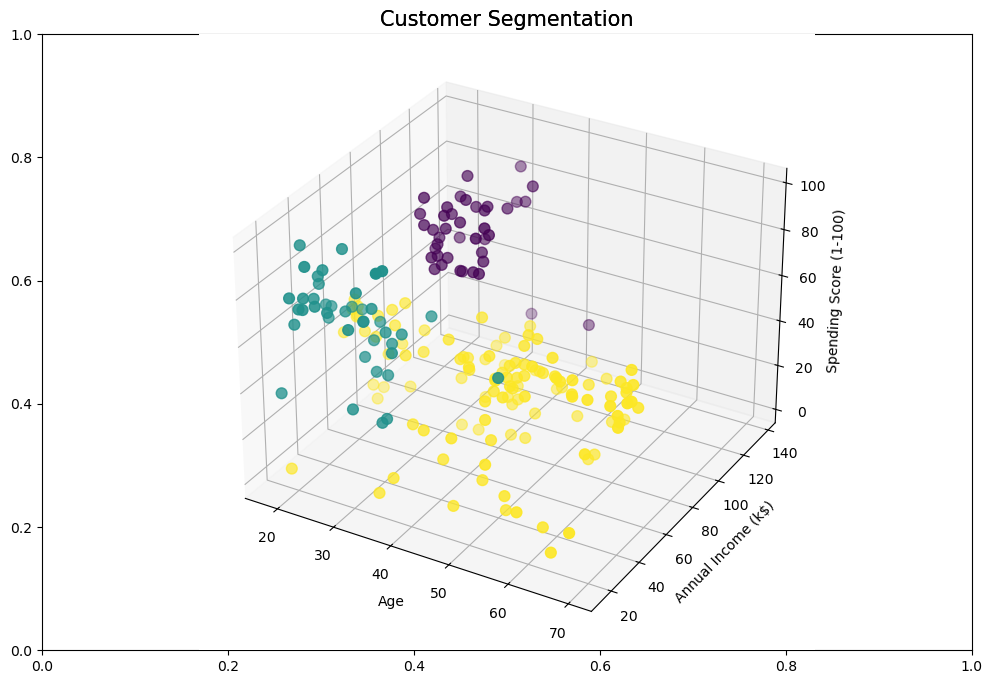

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

# Correct way to read a CSV file into a DataFrame
features = pd.read_csv("C:\\Users\\nayan\\Downloads\\archive\\Mall_Customers.csv")

fig = plt.figure(figsize=(12, 8))
plt.title("Customer Segmentation", fontsize=15)
ax = fig.add_subplot(111, projection='3d')
from sklearn.cluster import KMeans

# Assuming 'features' is your DataFrame with the relevant columns
kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(features[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Now you can use 'cluster_labels' in your scatter plot
ax.scatter(features['Age'], features['Annual Income (k$)'], features['Spending Score (1-100)'], c=cluster_labels, cmap='viridis', s=60)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title("Customer Segmentation", fontsize=15)
plt.show()









200
(200, 5)


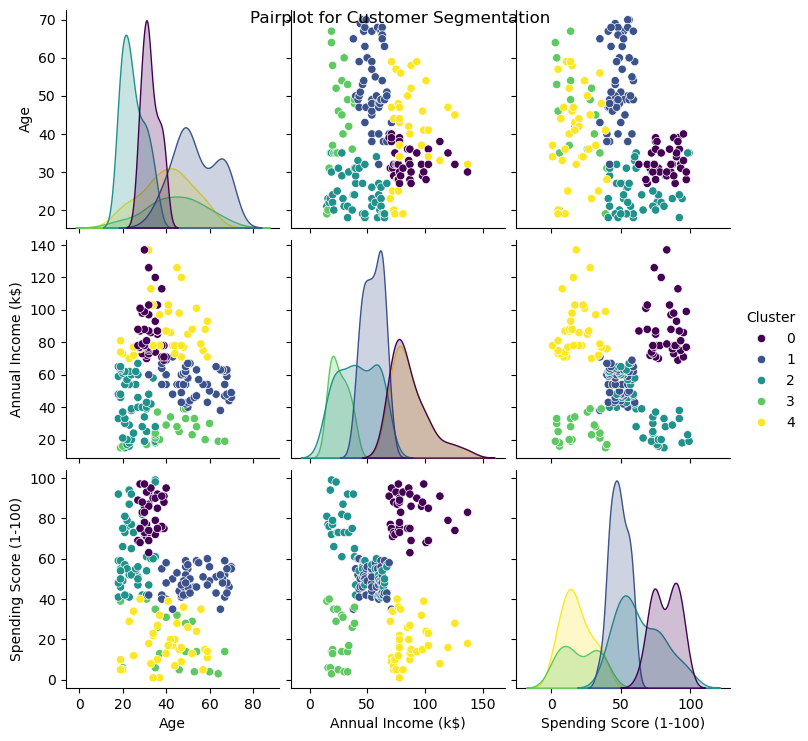

In [33]:
from sklearn.cluster import KMeans
df = pd.read_csv("C:\\Users\\nayan\\Downloads\\archive\\Mall_Customers.csv")

# Assume that you want to cluster based on the 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' columns
kmeans = KMeans(n_clusters=5)  # Replace 5 with the number of clusters you want
kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Generate cluster labels
train_cluster_labels = kmeans.labels_

# Check the length of the cluster labels
print(len(train_cluster_labels))

# Check the shape of your dataframe
print(df.shape)

# If the lengths don't match, you can try to slice your dataframe to match the length of the cluster labels
if len(train_cluster_labels) < df.shape[0]:
    df = df.head(len(train_cluster_labels))

# Now you can assign the cluster labels to a new column in your dataframe
df['Cluster'] = train_cluster_labels

# Now you can create the pairplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot for Customer Segmentation')
plt.show()